# NOTEBOOK TO RUN DATA EXPLORATION AND PRODUCE ASSOCIATED FIGURES

### Imports

In [14]:
import os
import pandas as pd
from config import DRIVE_PATH_VIVA
import numpy as np
import random
import json
import gzip
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

### Loading our data

In [2]:
video_file_path = os.path.join(DRIVE_PATH_VIVA, 'yt_metadata_en.jsonl.gz')

# loading
channels_df = pd.read_csv('data/df_channels_en.tsv', sep = "\t")
channels_df["join_date"] = pd.to_datetime(channels_df["join_date"])
print(channels_df.shape)

# timeseries_df = pd.read_csv('data/df_timeseries_en.tsv', sep = "\t")
# print(timeseries_df.shape)

(136470, 8)


In [3]:
educational_dfs_names = os.listdir(os.path.join(DRIVE_PATH_VIVA, 'extracted_Education'))
edu_dfs = [pd.read_csv(os.path.join(DRIVE_PATH_VIVA, 'extracted_Education', name)) for name in educational_dfs_names]


In [4]:
categories = ['Autos & Vehicles',
    'Comedy',
    'Education',
    'Entertainment',
    'Film and Animation',
    'Gaming',
    'Howto & Style',
    'Music',
    'News & Politics',
    'Nonprofits & Activism',
    'People & Blogs',
    'Pets & Animals',
    'Science & Technology',
    'Sports',
    'Travel & Events', 'NaN']
exploration_fig_path = os.path.join('figures', 'exploration')

if not os.path.exists(exploration_fig_path):
    os.makedirs(exploration_fig_path)

In [5]:
# Create a dictionary mapping channel to category_cc from df2
category_map = channels_df.set_index('channel')['category_cc'].to_dict()

# Map the category_cc to df1 based on channel id
for edu_df in edu_dfs:
    edu_df['category_cc_mapped'] = edu_df['channel_id'].map(category_map)


counts_df = pd.DataFrame(index=categories)

for i, edu_df in enumerate(edu_dfs):
    # Get the counts for the current dataframe, fill missing categories with 0
    counts = edu_df['category_cc_mapped'].value_counts(dropna=False).reindex(categories, fill_value=0)
    nan_count = edu_df['category_cc_mapped'].isna().sum()
    
    counts_df[f'df_{i}'] = counts
    
    # Now explicitly count NaN values for each DataFrame and add it as a row to the counts dataframe
nan_counts = [edu_df['category_cc_mapped'].isna().sum() for edu_df in edu_dfs]

    # Add a 'Nan' row to counts_df
counts_df.loc['NaN'] = nan_counts
    

In [6]:
display(counts_df)

,df_0,df_1,df_2,df_3,df_4,df_5,df_6,df_7
Autos & Vehicles,852,694,481,1450,5982,2565,2798,921
Comedy,1110,633,620,514,1261,731,658,674
Education,393266,403835,403066,391547,378759,388848,400614,384771
Entertainment,19121,20047,14785,13884,25513,20445,12692,18263
Film and Animation,1874,1998,3881,4346,4296,2059,2461,4056
Gaming,2529,4463,3744,1600,3529,5005,2260,3262
Howto & Style,9926,8408,6918,13580,9644,11568,7624,9710
Music,4199,3998,6045,2607,3887,3043,3163,2320
News & Politics,9006,5813,4862,11456,8678,6886,12730,12821
Nonprofits & Activism,3041,3359,3395,2814,10049,2871,3542,13565


In [7]:
counts_df['total']= counts_df.sum(axis = 1)

In [8]:
display(counts_df)


,df_0,df_1,df_2,df_3,df_4,df_5,df_6,df_7,total
Autos & Vehicles,852,694,481,1450,5982,2565,2798,921,15743
Comedy,1110,633,620,514,1261,731,658,674,6201
Education,393266,403835,403066,391547,378759,388848,400614,384771,3144706
Entertainment,19121,20047,14785,13884,25513,20445,12692,18263,144750
Film and Animation,1874,1998,3881,4346,4296,2059,2461,4056,24971
Gaming,2529,4463,3744,1600,3529,5005,2260,3262,26392
Howto & Style,9926,8408,6918,13580,9644,11568,7624,9710,77378
Music,4199,3998,6045,2607,3887,3043,3163,2320,29262
News & Politics,9006,5813,4862,11456,8678,6886,12730,12821,72252
Nonprofits & Activism,3041,3359,3395,2814,10049,2871,3542,13565,42636


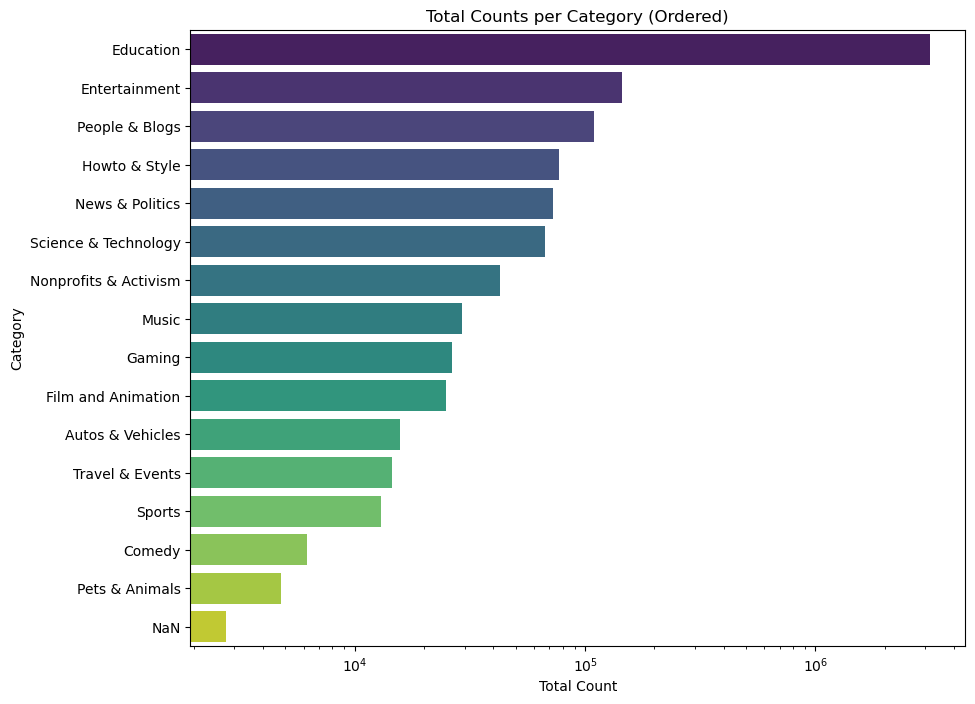

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by the 'total' column in descending order
counts_df_sorted = counts_df.sort_values(by='total', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='total', y=counts_df_sorted.index, data=counts_df_sorted, palette='viridis')

# Adding title and labels
plt.title('Total Counts per Category (Ordered)')
plt.xscale('log')
plt.xlabel('Total Count')
plt.ylabel('Category')
plt.savefig(os.path.join(exploration_fig_path, 'video_count_per_cat_barplot'))

# Show plot
plt.show()

In [ ]:
#data exploration
# - plot for each category of channel the distrib of channels and amount of educational videos they posted
# - find the top 3 for all categories and plot it there
# - yann demandait: distrib de post educaitonnels sur l'histoire de la chaine
# weight by views/number of vides per channel
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            


In [9]:
edu_dfs[0].head(1)

,Unnamed: 0,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,category_cc_mapped
0,0,Education,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:36.933325,A video to teach the kids to Learn the Colors ...,3.0,jCaqrZ8gSkY,116,11.0,"learn colors,kids colors,colors kids,count to ...",Learn Colors and Count to Ten with Colors Disn...,2016-05-03 00:00:00,2720.0,Gaming


In [10]:
total_channel_edu_df = pd.DataFrame()
for edu_df in edu_dfs:  
    channel_grouped_edu_df = edu_df['channel_id'].value_counts().reset_index()
    unique_channels = edu_df[['channel_id', 'category_cc_mapped']].drop_duplicates(subset='channel_id')
    channel_grouped_edu_df = channel_grouped_edu_df.merge(unique_channels, on='channel_id', how='left')

    total_channel_edu_df = pd.concat([total_channel_edu_df, channel_grouped_edu_df])
#final_channel_df = total_channel_edu_df.dropna()
final_channel_df = total_channel_edu_df

In [11]:
# Set up the dimensions of the subplot grid (adjust rows/cols based on the number of categories)
categories.sort()
num_categories = len(categories)
cols = 4
rows = (num_categories + cols - 1) // cols  # Calculate rows needed for given columns


In [12]:
print(final_channel_df['category_cc_mapped'].value_counts(dropna=False))

category_cc_mapped
Education                7781
Entertainment            4029
Howto & Style            2448
People & Blogs           2247
Gaming                   1714
Science & Technology     1604
Music                    1467
News & Politics           855
Film and Animation        788
Sports                    556
Comedy                    536
Autos & Vehicles          509
Travel & Events           414
Nonprofits & Activism     400
Pets & Animals            224
NaN                        24
Name: count, dtype: int64


### Histogram

i: 0, category: Autos & Vehicles
i: 1, category: Comedy
i: 2, category: Education
i: 3, category: Entertainment
i: 4, category: Film and Animation
i: 5, category: Gaming
i: 6, category: Howto & Style
i: 7, category: Music
i: 8, category: NaN
i: 9, category: News & Politics
i: 10, category: Nonprofits & Activism
i: 11, category: People & Blogs
i: 12, category: Pets & Animals
i: 13, category: Science & Technology
i: 14, category: Sports
i: 15, category: Travel & Events


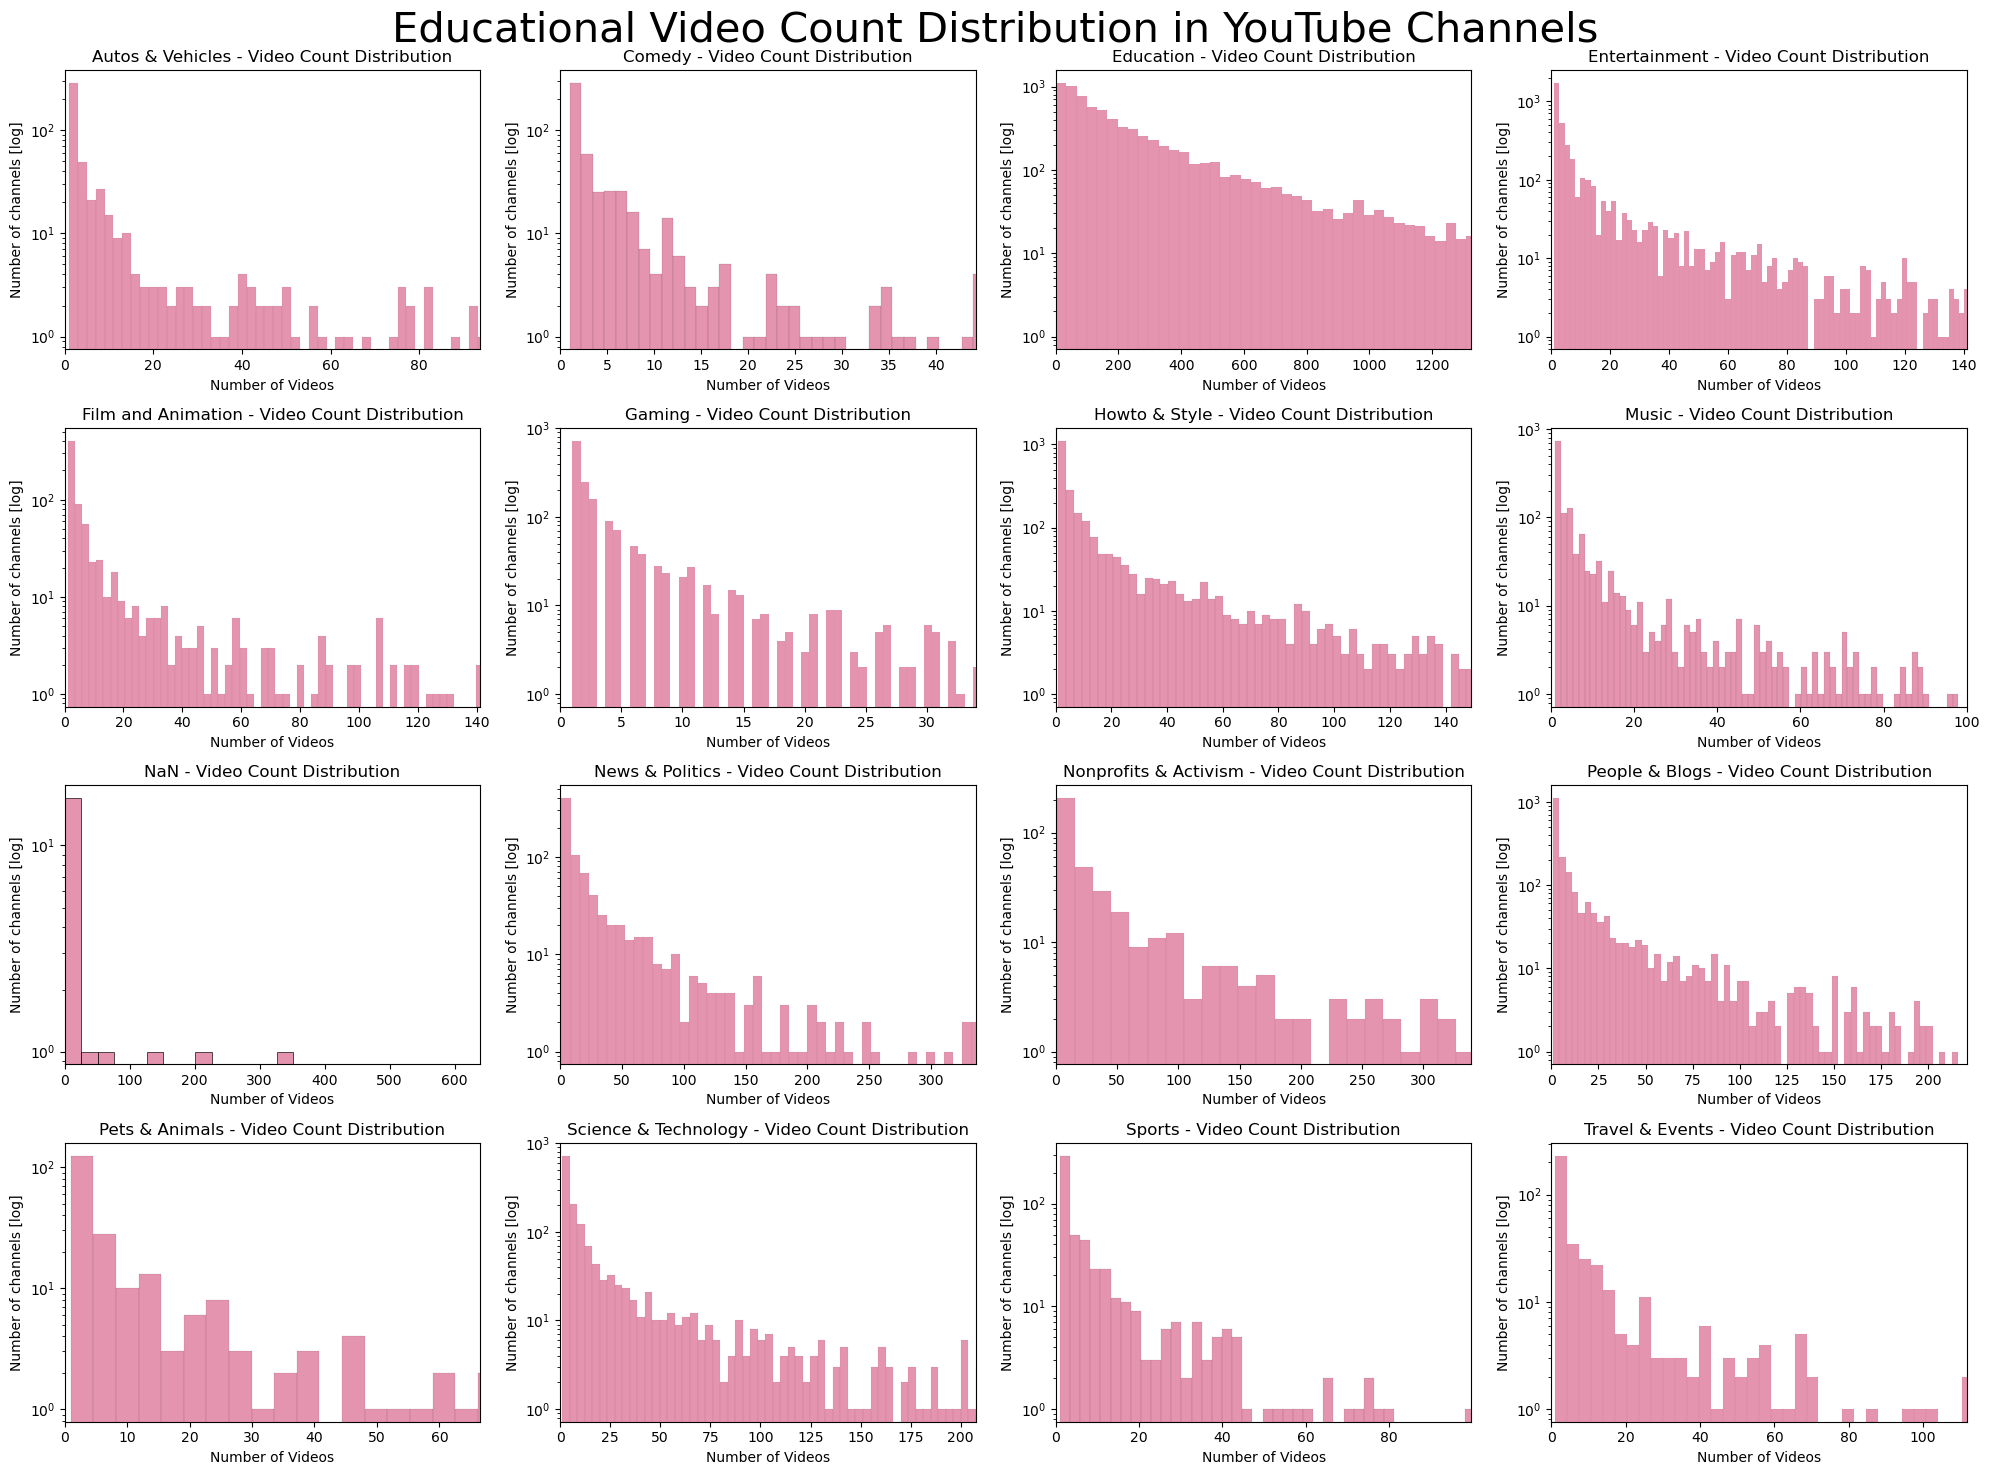

In [ ]:
# Create a figure with subplots for each category
fig, axes = plt.subplots(rows, cols, figsize=(20, 15), sharex=False, sharey=False)

# Flatten the axes array to easily iterate and plot
axes = axes.flatten()

# Loop through each category to plot
for i, category in enumerate(categories):
    print(f'i: {i}, category: {category}')
    if category != "NaN":
        cat_data = final_channel_df[final_channel_df['category_cc_mapped']== category]
        cat_data = cat_data.rename(columns = {'count': 'video_count'})
        cat_data = cat_data.groupby(['channel_id', 'category_cc_mapped'], as_index = False)['video_count'].sum()
    else:
        cat_data = final_channel_df[final_channel_df['category_cc_mapped'].isna()]
        cat_data = cat_data.rename(columns = {'count': 'video_count'})
        cat_data = cat_data.groupby(['channel_id'], as_index = False)['video_count'].sum()

    max_scale = cat_data['video_count'].quantile(0.95)
    # Plot the distribution
    sns.histplot(data = cat_data, x='video_count', ax=axes[i], color='palevioletred', edgecolor='black')
                 
                 

    axes[i].set_title(f'{category} - Video Count Distribution')
    axes[i].set_xlabel('Number of Videos')
    axes[i].set_yscale('log')
    axes[i].set_xlim([0, max_scale])
    axes[i].set_ylabel('Number of channels [log]')
        
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display plot
plt.suptitle('Educational Video Count Distribution in YouTube Channels', fontsize = 30)
plt.tight_layout()
plt.savefig(os.path.join(exploration_fig_path, 'video_count_distrib_hist'))
plt.show()


### Boxplots

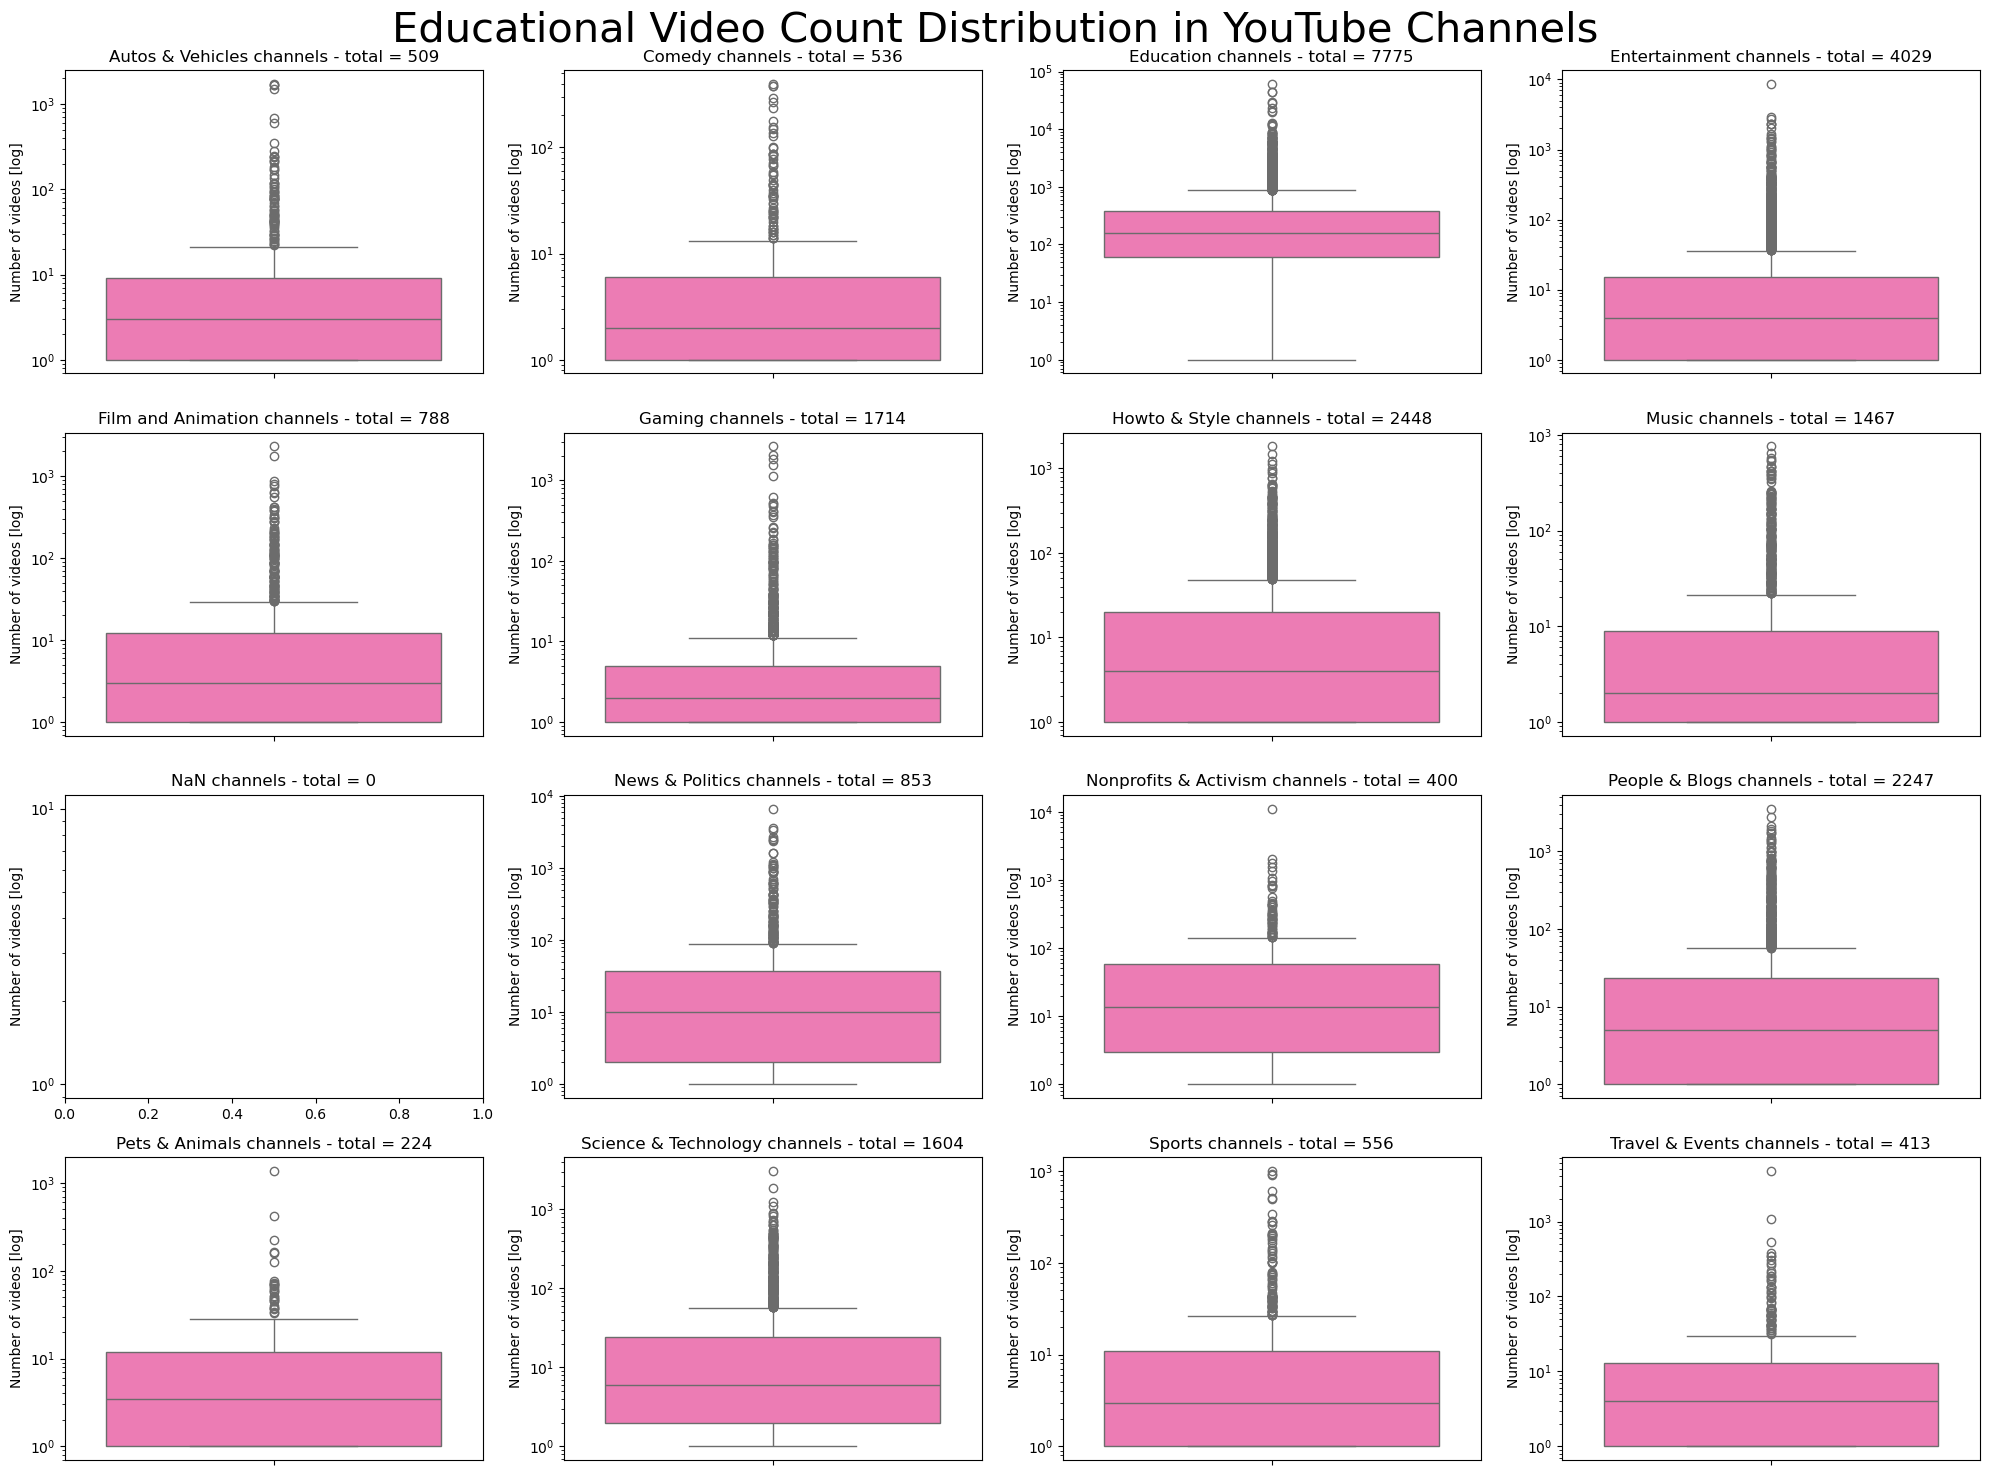

In [ ]:


# Create a figure with subplots for each category
fig, axes = plt.subplots(rows, cols, figsize=(20, 15), sharex=False, sharey=False)

# Flatten the axes array to easily iterate and plot
axes = axes.flatten()

# Loop through each category to plot
for i, category in enumerate(categories):
    if category != 'NaN':
        cat_data = final_channel_df[final_channel_df['category_cc_mapped']== category]
        cat_data = cat_data.rename(columns = {'count': 'video_count'})
        cat_data = cat_data.groupby(['channel_id', 'category_cc_mapped'], as_index = False)['video_count'].sum()
    else:
        cat_data = final_channel_df[final_channel_df['category_cc_mapped'].isna()]
        cat_data = cat_data.rename(columns = {'count': 'video_count'})
        cat_data = cat_data.groupby(['channel_id'], as_index = False)['video_count'].sum()


    # Plot the distribution
    sns.boxplot(data = cat_data, y='video_count', color='hotpink', ax = axes[i])
    axes[i].set_title(f'{category} channels - total = {len(cat_data)}')
    axes[i].set_ylabel('Number of videos [log]')
    axes[i].set_yscale('log')
        
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display plot
plt.suptitle('Educational Video Count Distribution in YouTube Channels', fontsize = 30)
plt.tight_layout()
plt.savefig(os.path.join(exploration_fig_path, 'video_count_distrib_boxplot'))
plt.show()


### top 3 channels 

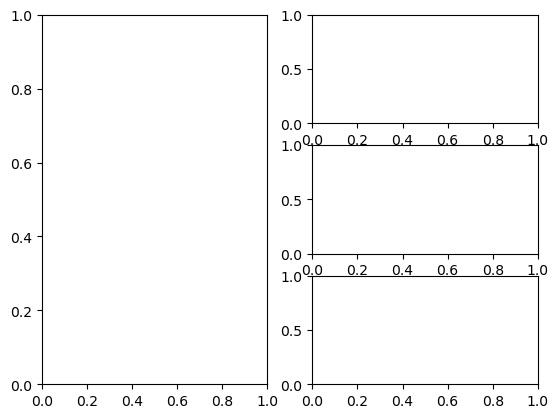

: 

In [ ]:
fig1 = plt.figure(facecolor = 'white')
# fig2 = plt.figure()  # more figures are easily accessible
# fig3 = plt.figure()  # more figures are easily accessible

ax11 = fig1.add_subplot(121)  
ax12 = fig1.add_subplot(322)  # add to third position in 2x2 grid (lower left) and sharex with ax11
ax13 = fig1.add_subplot(324, sharex = ax12) 
ax14 = fig1.add_subplot(326, sharex = ax13)
ax2 = fig1.add_subplot(122)

ax11.set_title('distrib title')
ax11.set_yaxis('axis y')
ax12.set_title('distrib title')
ax13.set_title('distrib title')
ax14.set_title('distrib title')
ax2.set_ylabel('axis y label ')
ax2.set_xlabel('axis x label')

plt.suptitle('suptitle')

### Processing

In [ ]:
# extract titles and tags


In [ ]:
import re
df = pd.read_csv(os.path.join(video_file_path, f'{category}_video.csv'), index_col=0)

df['desc_clean'] = df['description'].fillna('')
df['text'] = df['title'].fillna('') + " " + df['tags'].fillna('') 

#sort the description separately since way more garbage, some titles contain facebook and twitter and others that we are interested to remove

pd.set_option('display.max_colwidth', 80)
df.sample(5)[['desc_clean', 'text']]
# 32379 crypto video with lots of links
# 35962 marseillaise
# 22678 41830 non alpha and indian
# 34547 numbers accolated
# 17337 very long strings in crypto vids
# 3235 hindu

df

In [ ]:
df[df['title'].str.contains('twitter')]['title']

In [ ]:
string = df['description'].iloc[5046].lower()
print(string)
remove_urls(string)#.replace('website', 'website blab bla truc muche promotion')

In [ ]:
# everything to lower case so that same words are treated the same
df['text'] = df['text'].apply(lambda x: x.lower() if isinstance(x,str) else x)
df['desc_clean'] = df['desc_clean'].apply(lambda x: x.lower() if isinstance(x,str) else x)

In [ ]:
# remove urls links and their associated text
url_pattern = re.compile(r'(https?://\S+|www\.\S+)') 
com_pattern = re.compile(r'([^\s]+\.com)')
fb_pattern = re.compile(r'(facebook\s+page|facebook\s+group)[^\w\s]*.*?(\n|$)')
#lines that start with brands or websites 
link_pattern = re.compile(r'(\n+)(facebook|twitter|pinterest|tumblr|instagram|website|amazon)[^\w\s]*\s+\S+')
link_pattern2 = re.compile(r'(\n+)(facebook|twitter|pinterest|tumblr|instagram|website|amazon)')

#TODO lines that contain these websites in the middle of text - hard to implement since not sure if discard

long_words = re.compile(r'\b[a-zA-Z0-9]{21,}\b') # most words in english are below 20 letters, bigger than that is a crypto wallet id

def remove_urls(text, desc = False):
        text = url_pattern.sub('', text)
        text = com_pattern.sub('', text)
        text = long_words.sub('', text)
        if desc: # titles and tags should keep brand names since these might be the focus of the video
                text = fb_pattern.sub('', text)
                text = link_pattern.sub('', text)
                return link_pattern2.sub('', text)
        return text

df['desc_clean'] = df['desc_clean'].apply(remove_urls, desc = True)
df['text'] = df['text'].apply(remove_urls)
#test = 'https://www.youtube.com/everydaytacticalvids\n my twitter account - https://twitter.com/everydaytactic1\n my facebook group tha tha \n ow'
#remove_urls(test, True)

In [ ]:
def clean_non_word(text): #punctuation, underscores seem to evade this regex so add it
        return  re.sub(r'[^\w\s]|_+', ' ', text)

def clean_non_ascii(text): # indian symbols that might still be left
        return  re.sub(r'[^\x00-\x7F]+', ' ', text)

df['desc_clean'] = df['desc_clean'].apply(clean_non_word).apply(clean_non_ascii)
df['text'] = df['text'].apply(clean_non_word).apply(clean_non_ascii)

In [ ]:
def clean_numeric(text):
    return re.sub(r'\d+(?![a-zA-Z])', '', text) # numbers that are not accolated to strings : # TODO MAybe all numbers
df['desc_clean'] = df['desc_clean'].apply(clean_numeric)
df['text'] = df['text'].apply(clean_numeric)

In [ ]:
def clean_space_newline(text):
    return re.sub(r'\s{2,}', ' ', text.replace('\n', ' ')).strip()

df['desc_clean'] = df['desc_clean'].apply(clean_space_newline)
df['text'] = df['text'].apply(clean_space_newline)

In [ ]:
df['text_clean'] = df['text'] + " "+ df['desc_clean']
df = df.drop(['text', 'desc_clean'], axis = 1)
df.to_csv(op.join(DERIV, 'df_edu_500k_clean.csv'))

In [ ]:
#df= pd.read_csv(op.join(DERIV, 'df_edu_all_clean.csv'))
#optional : make it lighter 
df = df.drop(['description'], axis = 1)

In [ ]:
# no need to perform lemmatization, stemming or stopword removal since BERT handles it 

### Categorization

In [ ]:
trial = df#.copy().sample(5000)
pd.set_option('display.max_colwidth', 80)
trial = trial.reset_index()

# Try to extract sub topics with sentence BERt like transformer s
from sentence_transformers import SentenceTransformer # https://sbert.net/
from sklearn.cluster import KMeans


print('Encoding model...')
model = SentenceTransformer('all-MiniLM-L6-v2') 
embeddings = model.encode(trial.get('text_clean'))

# Step 2: Perform K-Means clustering
print('Starting kmeans...')
num_clusters = 50
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

print('Fitting model...')
clusters = kmeans.fit(embeddings)
cluster_assignment = clusters.labels_

print('Predicting labels...')
trial['subcategories'] = clusters.predict(embeddings)